In [28]:
# Shashi Bhushan
# MSDS DSC 680, Spring 2024
# Project Milestone 2

In [29]:
# Importing libraries
import pandas as pd
import numpy as np

In [113]:
# Reading CSV File
df = pd.read_csv('fraud test.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [114]:
# Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [115]:
# finding percentage of missing values in each feature
for column in df.columns:
    print('{} has {} % missing values'.format(column,np.round(df[column].isnull().sum()/len(df)*100,4)))

Unnamed: 0 has 0.0 % missing values
trans_date_trans_time has 0.0 % missing values
cc_num has 0.0 % missing values
merchant has 0.0 % missing values
category has 0.0 % missing values
amt has 0.0 % missing values
first has 0.0 % missing values
last has 0.0 % missing values
gender has 0.0 % missing values
street has 0.0 % missing values
city has 0.0 % missing values
state has 0.0 % missing values
zip has 0.0 % missing values
lat has 0.0 % missing values
long has 0.0 % missing values
city_pop has 0.0 % missing values
job has 0.0 % missing values
dob has 0.0 % missing values
trans_num has 0.0 % missing values
unix_time has 0.0 % missing values
merch_lat has 0.0 % missing values
merch_long has 0.0 % missing values
is_fraud has 0.0 % missing values


In [116]:
# dropping duplicate rows if any
df.drop_duplicates(inplace=True)
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [117]:
#Dropping features which do not add value to analysis
df=df.drop(['Unnamed: 0','trans_date_trans_time','trans_num','merchant','unix_time','street','cc_num','first','last'],axis=1)
df.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,33.986391,-81.200714,0
1,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,39.450498,-109.960431,0
2,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,40.495810,-74.196111,0
3,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,28.812398,-80.883061,0
4,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,44.959148,-85.884734,0


In [118]:
# Add age column from birth date
from datetime import datetime
df['dob'] = pd.to_datetime(df['dob'].str.strip(), format='%d/%m/%Y')
df.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0
1,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0
2,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0
3,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0
4,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0


In [119]:
# Creating Age Column
from datetime import date
def age(birth_year):
    return date.today().year - birth_year

In [120]:
df['Age']= df['dob'].dt.year
df['Age'] = df['dob'].dt.year.apply(age)
df.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Age
0,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,56
1,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,34
2,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,54
3,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,37
4,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,69


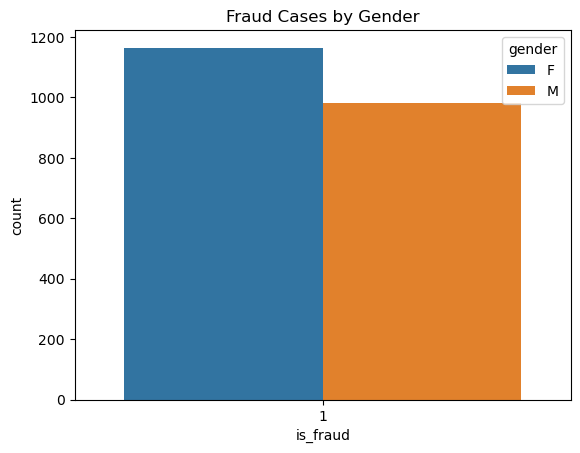

In [121]:
#  Bar chart showing count of males and females with fraud being 1.
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Fraud Cases by Gender")
df2= df[df.is_fraud==1]
sns.countplot(x ='is_fraud', hue = "gender", data = df2)
plt.show()

<Axes: title={'center': 'Gender Proportion Subjected to  Credit Card Fraud'}>

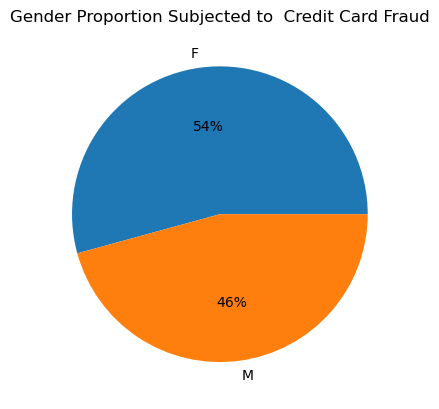

In [122]:
# Associated Piechart
df2.groupby('gender').size().plot.pie(autopct='%1.0f%%',title='Gender Proportion Subjected to  Credit Card Fraud')

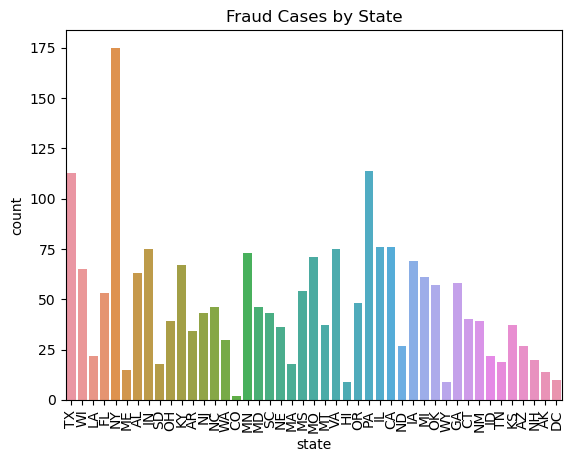

In [123]:
# Bar chart showing counts by State with fraud cases.
plt.title("Fraud Cases by State")
sns.countplot(x ='state', data = df2)
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'States Proportion Subjected to  Credit Card Fraud'}>

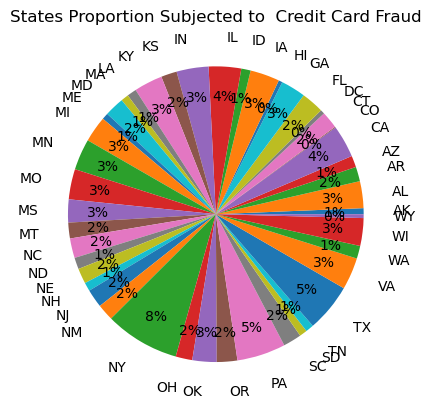

In [124]:
# Associated Pie Chart
df2.groupby('state').size().plot.pie(autopct='%1.0f%%',title='States Proportion Subjected to  Credit Card Fraud',pctdistance=0.8, labeldistance=1.2
                                    )

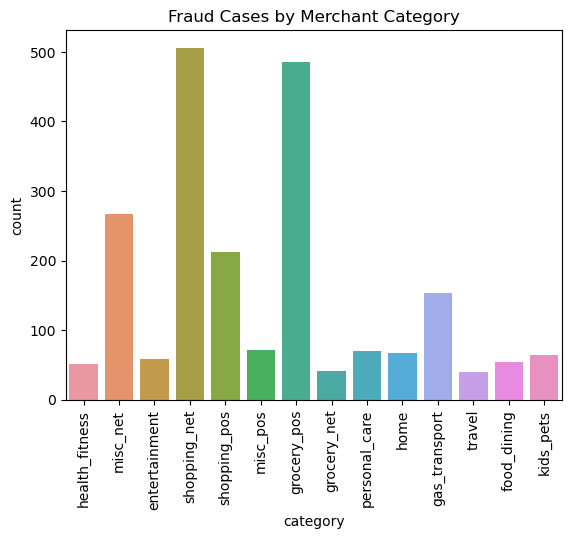

In [125]:
# Bar chart showing counts by Category.
plt.title("Fraud Cases by Merchant Category")
sns.countplot(x ='category', data = df2)
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'merchant categories Proportion Subjected to  Credit Card Fraud'}>

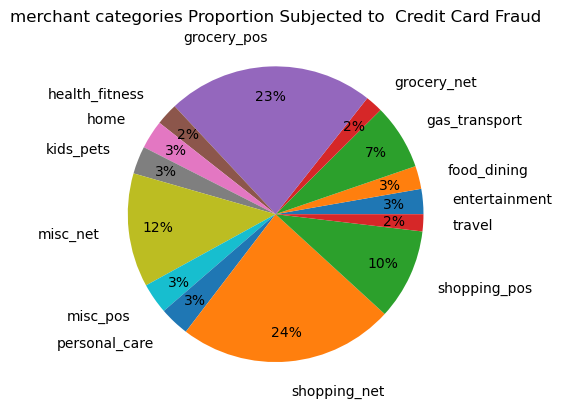

In [126]:
# Associated Pie Chart
df2.groupby('category').size().plot.pie(autopct='%1.0f%%',title='merchant categories Proportion Subjected to  Credit Card Fraud',pctdistance=0.8, labeldistance=1.2
                                    )

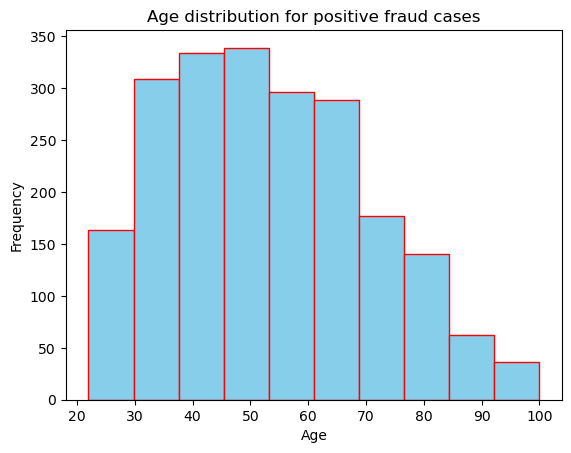

In [127]:
# Bar chart showing counts by Age with positive fraud cases
plt.title("Age distribution for positive fraud cases")
plt.hist(df2['Age'],bins=10,color='skyblue',edgecolor='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [128]:
df=df.drop(['state','dob'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   city        555719 non-null  object 
 4   zip         555719 non-null  int64  
 5   lat         555719 non-null  float64
 6   long        555719 non-null  float64
 7   city_pop    555719 non-null  int64  
 8   job         555719 non-null  object 
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
 12  Age         555719 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 55.1+ MB


In [129]:
# Creating numeric variables for object features
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['category'] = LE.fit_transform(df['category'])
df['gender'] = LE.fit_transform(df['gender'])
df['city'] = LE.fit_transform(df['city'])
df['job'] = LE.fit_transform(df['job'])
df.head()

,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,Age
0,10,2.86,1,157,29209,33.9659,-80.9355,333497,275,33.986391,-81.200714,0,56
1,10,29.84,0,16,84002,40.3207,-110.4360,302,392,39.450498,-109.960431,0,34
2,5,41.28,0,61,11710,40.6729,-73.5365,34496,259,40.495810,-74.196111,0,54
3,9,60.05,1,764,32780,28.5697,-80.8191,54767,407,28.812398,-80.883061,0,37
4,13,3.19,1,247,49632,44.2529,-85.0170,1126,196,44.959148,-85.884734,0,69


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  int32  
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  int32  
 3   city        555719 non-null  int32  
 4   zip         555719 non-null  int64  
 5   lat         555719 non-null  float64
 6   long        555719 non-null  float64
 7   city_pop    555719 non-null  int64  
 8   job         555719 non-null  int32  
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
 12  Age         555719 non-null  int64  
dtypes: float64(5), int32(4), int64(4)
memory usage: 46.6 MB


In [131]:
# Importing the train_test_split Function and splitting dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [132]:
y = df['is_fraud']
X = df.drop(['is_fraud'], axis=1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [134]:
#build Logistic Regression Model. 

lr = LogisticRegression(solver='lbfgs',max_iter=1000)

In [135]:
# Train Logistic Regression on the training data
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [136]:
#Evaluationg the model using accuracy score
y_test_pred = lr.predict(X_test)
accuracy = accuracy_score( y_test, y_test_pred)
accuracy

0.9958792197509537

In [137]:
#Accuracy on model training data
y_train_pred =lr.predict(X_train)
accuracy = accuracy_score( y_train, y_train_pred)
accuracy

0.9958139796434797

In [138]:
# Confusion matrix plot
cm=confusion_matrix(y_test, y_test_pred)

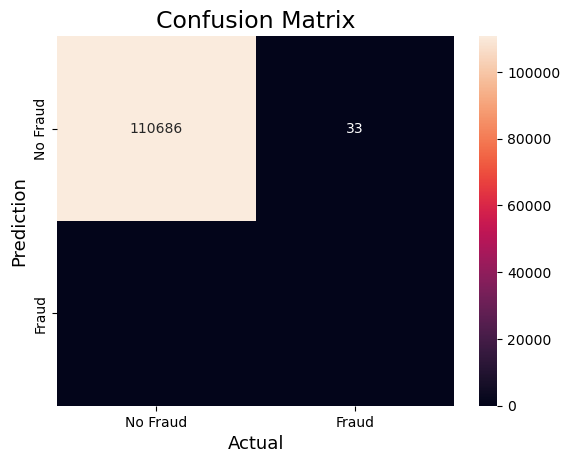

In [139]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Fraud','Fraud'],
            yticklabels=['No Fraud','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [140]:
print(classification_report(y_test, y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110719
           1       0.00      0.00      0.00       425

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [141]:
# Now training on KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [142]:
#Evaluationg the model using accuracy score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.99669797739869

In [143]:
#Accuracy on model training data
y_train_pred =knn.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9981622898273632

In [144]:
# Confusion matrix plot
cm=confusion_matrix(y_test, y_test_pred)

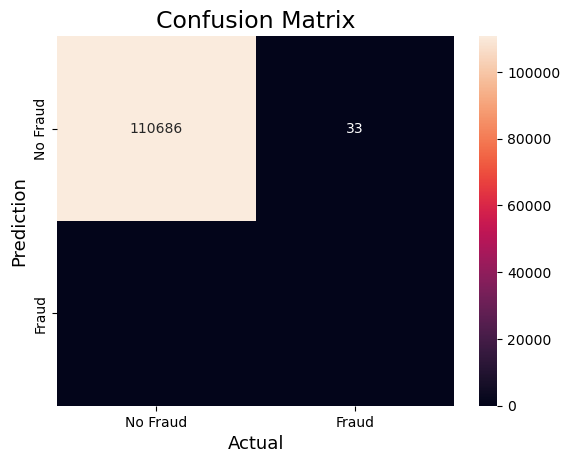

In [145]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Fraud','Fraud'],
            yticklabels=['No Fraud','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [146]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110719
           1       0.59      0.45      0.51       425

    accuracy                           1.00    111144
   macro avg       0.79      0.72      0.75    111144
weighted avg       1.00      1.00      1.00    111144



In [147]:
df_population = pd.read_csv('NST-EST2023-ALLDATA.csv')
df_population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
0,40,3,6,1,Alabama,5024294,5031864,5050380,5073903,5108468,...,-0.306805,0.358254,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186
1,40,4,9,2,Alaska,733374,732964,734923,733276,733406,...,5.024947,1.189465,3.209374,2.732699,-4.016658,-9.810659,-7.558557,-2.827193,-6.601285,-4.825859
2,40,4,8,4,Arizona,7157902,7186683,7272487,7365684,7431344,...,1.041020,1.107947,3.046282,2.924236,11.382396,9.536437,4.890036,12.490343,12.582720,7.814272
3,40,3,7,5,Arkansas,3011490,3014348,3028443,3046404,3067732,...,-0.296690,0.445490,1.058463,1.339846,5.893303,6.202955,5.922668,6.338793,7.261417,7.262514
4,40,4,9,6,California,39538212,39503200,39145060,39040616,38965193,...,2.856608,1.121856,3.236322,3.871045,-11.668713,-8.512685,-8.675533,-10.546858,-5.276363,-4.804488


In [148]:
#Insert states column
df_population.insert(5, "states", ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID",
                                   "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", 
                                   "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", 
                                   "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"], True)
df_population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,states,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,...,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
0,40,3,6,1,Alabama,AL,5024294,5031864,5050380,5073903,...,-0.306805,0.358254,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186
1,40,4,9,2,Alaska,AK,733374,732964,734923,733276,...,5.024947,1.189465,3.209374,2.732699,-4.016658,-9.810659,-7.558557,-2.827193,-6.601285,-4.825859
2,40,4,8,4,Arizona,AZ,7157902,7186683,7272487,7365684,...,1.041020,1.107947,3.046282,2.924236,11.382396,9.536437,4.890036,12.490343,12.582720,7.814272
3,40,3,7,5,Arkansas,AR,3011490,3014348,3028443,3046404,...,-0.296690,0.445490,1.058463,1.339846,5.893303,6.202955,5.922668,6.338793,7.261417,7.262514
4,40,4,9,6,California,CA,39538212,39503200,39145060,39040616,...,2.856608,1.121856,3.236322,3.871045,-11.668713,-8.512685,-8.675533,-10.546858,-5.276363,-4.804488


In [149]:
df2_state = df2.groupby('state')['is_fraud'].sum().reset_index(name='count')
df2_state

,state,count
0,AK,14
1,AL,63
2,AR,34
3,AZ,27
4,CA,76
5,CO,2
6,CT,40
7,DC,10
8,FL,53
9,GA,58


In [150]:
df2_state.insert(2,'population',df_population['POPESTIMATE2020'])
df2_state.insert(3,'proportion',df2_state['count']/df2_state['population'])
df2_state

,state,count,population,proportion
0,AK,14,5031864,2.782269e-06
1,AL,63,732964,8.595238e-05
2,AR,34,7186683,4.730973e-06
3,AZ,27,3014348,8.957161e-06
4,CA,76,39503200,1.923895e-06
5,CO,2,5785219,3.457086e-07
6,CT,40,3577586,1.118072e-05
7,DC,10,991862,1.008205e-05
8,FL,53,670839,7.900554e-05
9,GA,58,21591299,2.686267e-06


In [151]:
# find correlation
corr = np.corrcoef(df2_state['count'],df2_state['population'])
corr

array([[1.        , 0.32183026],
       [0.32183026, 1.        ]])

In [152]:
df2.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,Age
1685,health_fitness,24.84,F,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,32.575873,-102.604290,1,55
1767,misc_net,780.52,M,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1958-09-10,42.461127,-91.147148,1,66
1781,entertainment,620.33,M,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1958-09-10,42.771834,-90.158365,1,66
1784,shopping_net,1077.69,M,Denham Springs,LA,70726,30.4590,-90.9027,71335,Herbalist,1994-05-31,31.204974,-90.261595,1,30
1857,shopping_pos,842.65,F,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,31.315782,-102.736390,1,55


In [153]:
df2_hypo= df.groupby('gender')['is_fraud'].sum().reset_index(name='count')
df2_hypo.insert(2,'proportion',df2_hypo['count']/sum(df2_hypo['count']))
df2_hypo

,gender,count,proportion
0,0,1164,0.542657
1,1,981,0.457343


In [154]:
df2_total= df.groupby('gender')['is_fraud'].count().reset_index(name='count')
df2_total

,gender,count
0,0,304886
1,1,250833


In [155]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([981,1164])
nobs = np.array([250833,304886])
                 
stat, pval = proportions_ztest(count, nobs)
print(f"P-value: {pval:.3f}")

P-value: 0.577


In [156]:
df=df.drop(['lat','long'],axis=1)
df.head()

,category,amt,gender,city,zip,city_pop,job,merch_lat,merch_long,is_fraud,Age
0,10,2.86,1,157,29209,333497,275,33.986391,-81.200714,0,56
1,10,29.84,0,16,84002,302,392,39.450498,-109.960431,0,34
2,5,41.28,0,61,11710,34496,259,40.495810,-74.196111,0,54
3,9,60.05,1,764,32780,54767,407,28.812398,-80.883061,0,37
4,13,3.19,1,247,49632,1126,196,44.959148,-85.884734,0,69


In [157]:
y = df['is_fraud']
X = df.drop(['is_fraud'], axis=1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [159]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [160]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.996724969409055

In [161]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110701
           1       0.63      0.44      0.52       443

    accuracy                           1.00    111144
   macro avg       0.81      0.72      0.76    111144
weighted avg       1.00      1.00      1.00    111144

